In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Zpracování dat

In [ ]:
data = pd.read_csv("Kabrt.csv", sep=',')
data.head()

,Pocet_pokoju,Kuchyne,Cena,Plocha,GPS_lat,GPS_lon,Novostavba,Rekonstuovano,Vytah,Parkovani,Sklep,Balkon
0,3,1,24324000,149,50.101912,14.521625,0,0,1,1,1,0
1,3,0,11287000,77,50.058516,14.443477,0,0,0,0,1,0
2,1,1,5642000,45,50.766001,15.188790,0,0,1,0,0,0
3,4,1,11248000,110,49.944998,14.056740,0,0,1,1,1,0
4,3,1,6215000,102,49.578486,16.900783,0,0,0,0,1,1


In [ ]:
puvodni_cena = data["Cena"]/1000
data["Cena"] = puvodni_cena
data.head()

,Pocet_pokoju,Kuchyne,Cena,Plocha,GPS_lat,GPS_lon,Novostavba,Rekonstuovano,Vytah,Parkovani,Sklep,Balkon
0,3,1,24324.0,149,50.101912,14.521625,0,0,1,1,1,0
1,3,0,11287.0,77,50.058516,14.443477,0,0,0,0,1,0
2,1,1,5642.0,45,50.766001,15.188790,0,0,1,0,0,0
3,4,1,11248.0,110,49.944998,14.056740,0,0,1,1,1,0
4,3,1,6215.0,102,49.578486,16.900783,0,0,0,0,1,1


# Rozdělení dat

In [ ]:
#input_features = ['Pocet_pokoju', 'Kuchyne', 'Plocha',  'GPS_lat', 'GPS_lon', 'Rekonstuovano', 'Parkovani', 'Sklep'] puvodni
input_features = ['Pocet_pokoju', 'Kuchyne','Plocha',  'GPS_lat', 'GPS_lon']
target_feature = 'Cena'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[input_features], data[target_feature], test_size=0.1)

# Trenovani Random forest Regressoru

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
rf = RandomForestRegressor(n_estimators=150,max_depth=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mse_od = (mse**0.5)
mae, mse, mse_od

(1634.168167000344, 6652474.815605158, 2579.2391931740567)

(1109091.3359190845, 2202878647345.3057, 1484209.7720151641)

(859591.5977847984, 1634202443848.7131, 1278359.2780782378)

(766.8448763141621, 1378510.3516569862, 1174.0998048108968) s cenou na tisice a 1 procento dat

(1634.168167000344, 6652474.815605158, 2579.2391931740567) s 10 procenty testovacich dat



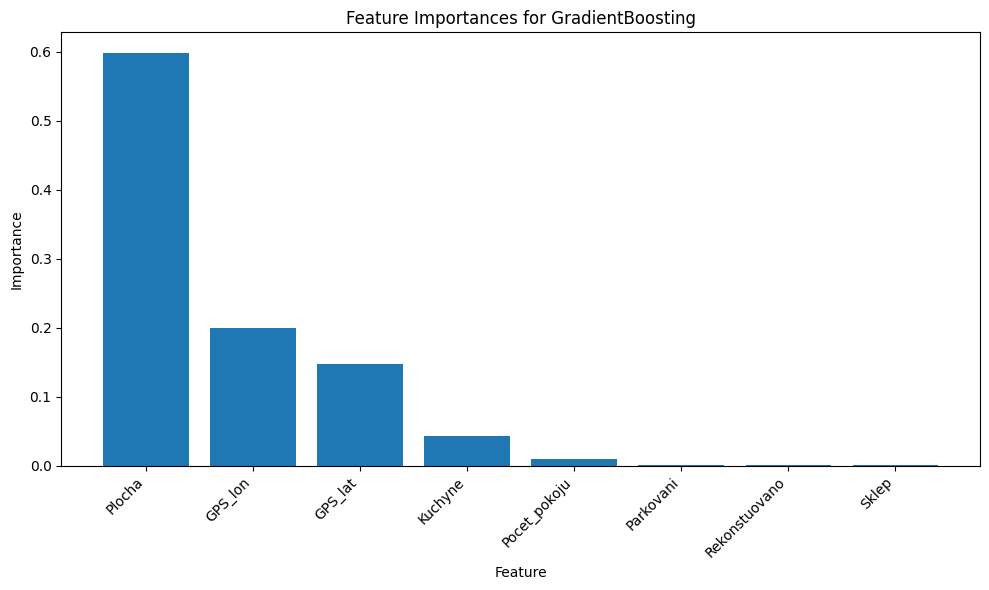

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt

data = pd.read_csv("Kabrt.csv", sep=',')

input_features = ['Pocet_pokoju', 'Kuchyne', 'Plocha',  'GPS_lat', 'GPS_lon', 'Rekonstuovano', 'Parkovani', 'Sklep']
target_feature = 'Cena'
X_train, X_test, y_train, y_test = train_test_split(data[input_features], data[target_feature], test_size=0.25)
model = GradientBoostingRegressor(n_estimators=200)
model.fit(X_train, y_train)

importances = model.feature_importances_


# Create a DataFrame for easy plotting
fi_df = pd.DataFrame({
    "Feature": input_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(fi_df["Feature"], fi_df["Importance"])
plt.xticks(rotation=45, ha="right")
plt.title(f"Feature Importances for GradientBoosting")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Zatím nejlepší model: (1647145.7509839828, 5765268114903.88)

# Ada Boost Regresor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
tr = AdaBoostRegressor()
tr.fit(X_train, y_train)
y_pred = tr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae, mse

(4014.371552910023, 26859279.51174297)

(3641514.1636226773, 21132741511103.58)

# Linearni Regrese

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = LinearRegression(positive=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) #**0.5 Přidal Oliver
mae, mse

(3639.0644207983655, 40250231.562733375)

(3184227.530352565, 18695894342255.938)

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
br = GradientBoostingRegressor(n_estimators=100,min_samples_split= 50,min_samples_leaf=50)
br.fit(X_train, y_train)
y_pred = br.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae, mse

(2210.46706615048, 14814369.55407929)

(1760209.334751723, 6450499687232.315)

# Neuronová sit

In [ ]:
import pandas as pd
data = pd.read_csv("Kabrt.csv", sep=',')
data.head()

,Pocet_pokoju,Kuchyne,Cena,Plocha,GPS_lat,GPS_lon,Novostavba,Rekonstuovano,Vytah,Parkovani,Sklep,Balkon
0,3,1,24324000,149,50.101912,14.521625,0,0,1,1,1,0
1,3,0,11287000,77,50.058516,14.443477,0,0,0,0,1,0
2,1,1,5642000,45,50.766001,15.188790,0,0,1,0,0,0
3,4,1,11248000,110,49.944998,14.056740,0,0,1,1,1,0
4,3,1,6215000,102,49.578486,16.900783,0,0,0,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split

input_features = ['Pocet_pokoju', 'Kuchyne', 'Plocha',  'GPS_lat', 'GPS_lon', 'Rekonstuovano', 'Parkovani', 'Sklep']
target_feature = 'Cena'

X_train, X_test, y_train, y_test = train_test_split(data[input_features], data[target_feature], test_size=0.1, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(30, input_shape=(8, )))
model.add(Activation('tanh'))
model.add(Dense(30))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae'])

In [ ]:
model.fit(X_train_std, y_train,
  batch_size = 64,
  epochs = 100,
  verbose=1,
  validation_data=(X_test_std, y_test)
)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 168824192106496.0000 - mae: 10291932.0000 - val_loss: 129713540431872.0000 - val_mae: 9447884.0000
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173058140667904.0000 - mae: 10450953.0000 - val_loss: 129713498488832.0000 - val_mae: 9447882.0000
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 159791674556416.0000 - mae: 10096930.0000 - val_loss: 129713448157184.0000 - val_mae: 9447880.0000
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 166780492316672.0000 - mae: 10198713.0000 - val_loss: 129713364271104.0000 - val_mae: 9447875.0000
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 173544797372416.0000 - mae: 10451985.0000 - val_loss: 129713305550848.0000 - val_mae: 9447869.0000
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 165012911947776.0000 - mae: 10215156.0000 - val_loss: 129713221664768.0000 - val_mae: 9447867.0000
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test_std)

mae= mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
mae, rmse

(9447724.0, 129710554087424.0)

(9447724.0, 129710554087424.0)

# Export modelu


In [ ]:
import pickle
model_pkl_file = "LinearniStrom5Featur.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(rf, file)